# To Predict The diabetes from pima diabetes dataset

### Importing the required libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# to load the dataset from csv file 
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# we will going to chek the data set shape
data.shape

(768, 9)

In [5]:
# we will knowing the about data set information like are features which  dtypes are in there in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# we will check the null values in dataset
data.isna().sum()
#there is no null values 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
# so next we will find the data statistical calculation 
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# we will find the total num of zeros in each features
print('total no of rows : {0}'.format(len(data)))
print('total no of missing Glucose in zeros :{0}'.format(len(data[data['Glucose']==0])))
print('total no of missing BloodPressure in zeros :{0}'.format(len(data[data['BloodPressure']==0])))
print('total no of missing SkinThickness in zeros:{0}'.format(len(data[data['SkinThickness']==0])))
print('total no of missing Insulin in zeros:{0}'.format(len(data[data['Insulin']==0])))
print('total no of missing BMI in zeros:{0}'.format(len(data[data['BMI']==0])))

total no of rows : 768
total no of missing Glucose in zeros :5
total no of missing BloodPressure in zeros :35
total no of missing SkinThickness in zeros:227
total no of missing Insulin in zeros:374
total no of missing BMI in zeros:11


In [9]:
# in this dataset some feature  information is 0 so we will fill the replacing zero with ,mean or median 
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

In [10]:
### Now check the zeros in features
print('total no of rows : {0}'.format(len(data)))
print('total no of missing Glucose in zeros :{0}'.format(len(data[data['Glucose']==0])))
print('total no of missing BloodPressure in zeros :{0}'.format(len(data[data['BloodPressure']==0])))
print('total no of missing SkinThickness in zeros:{0}'.format(len(data[data['SkinThickness']==0])))
print('total no of missing Insulin in zeros:{0}'.format(len(data[data['Insulin']==0])))
print('total no of missing BMI in zeros:{0}'.format(len(data[data['BMI']==0])))

total no of rows : 768
total no of missing Glucose in zeros :0
total no of missing BloodPressure in zeros :0
total no of missing SkinThickness in zeros:0
total no of missing Insulin in zeros:0
total no of missing BMI in zeros:0


In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# we will check the weather data set will be the balnced or imbalanced data target labels
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [14]:
# finally we have to done this all data cleaning process 
#### next we will separate the data features 

In [15]:
X = data.drop(['Outcome'],axis  = 1)   # independent
y = data['Outcome']     # dependent 

In [16]:
# Scaling the Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Splitting the data as train and test 

In [17]:
### splitting the data ; to avoid the overfitting the data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

### Model Creating 

### Logistic regression 

'''Logistic Regrression - the mainly depend on line of the linearity wil be shaped as curve as that use sigmoid function 
and after that the prediction will be going to declre with threshold value. 
THRESHOLD is mainly to provide the under 0.5 vALUE PREDICTED MEANS IT IS 0 AND OVER THE 0.5 IS PREDICTED AS 1'''


### model building

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train,y_train)

LogisticRegression()

In [20]:
#predicting  The model on test data
prediction = logistic_reg.predict(X_test)

### model Evaluation 

In [21]:
# model Evaluation Techniques is a  metricks from scikitlearn
## in classification problems we will get the model accuracy, confusion matrix and classifiction reports like precision ,recall,f1,accuracy

In [22]:
from sklearn.metrics import accuracy_score,classification_report

acc_score = metrics.accuracy_score(y_test,prediction)

<IPython.core.display.Javascript object>

In [23]:
acc_score

0.7662337662337663

In [24]:

cf = metrics.classification_report(y_test,prediction)

<IPython.core.display.Javascript object>

In [25]:
print(cf)

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
cm = metrics.confusion_matrix(y_test,prediction)

<IPython.core.display.Javascript object>

<AxesSubplot:>

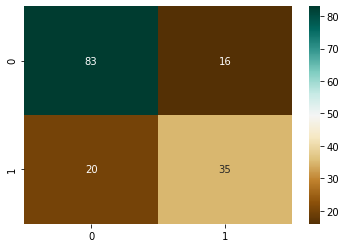

In [28]:
sns.heatmap(cm,annot=True,cmap = 'BrBG')

## Random forest classification

In [29]:
## we will tri some best models random forest 
from sklearn.ensemble import RandomForestClassifier
rf =  RandomForestClassifier(random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

### Prediction

In [30]:
pred_rf = rf.predict(X_test)

#### Evaluation

In [46]:
print('rf_score is :', metrics.accuracy_score(y_test,pred_rf))
print( metrics.classification_report(y_test,pred_rf))

<IPython.core.display.Javascript object>

rf_score is : 0.7792207792207793


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        99
           1       0.70      0.67      0.69        55

    accuracy                           0.78       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.78      0.78       154



In [47]:
print(metrics.confusion_matrix(y_test,pred_rf))

<IPython.core.display.Javascript object>

[[83 16]
 [18 37]]


In [31]:
cm_rf = metrics.confusion_matrix(y_test,pred_rf)

<IPython.core.display.Javascript object>

<AxesSubplot:>

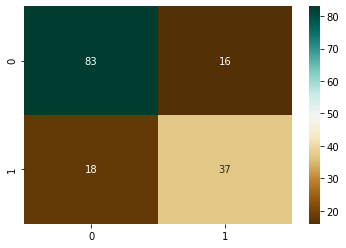

In [48]:
sns.heatmap(cm_rf,annot=True,cmap = 'BrBG')

## Desicion tree clasification

In [49]:
### we will create the Decision tree works on entropys like as which entropy value  will be greater so at the time decision trees will get take the decison is the avg of the all trees values  
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

### prediction 

In [50]:
dt_pred = dt.predict(X_test)

### Evaluation

In [51]:
print('rf_score is :', metrics.accuracy_score(y_test,dt_pred))
print( metrics.classification_report(y_test,dt_pred))

<IPython.core.display.Javascript object>

rf_score is : 0.7272727272727273


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.82      0.74      0.78        99
           1       0.60      0.71      0.65        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



<IPython.core.display.Javascript object>

[[73 26]
 [16 39]]


<IPython.core.display.Javascript object>

<AxesSubplot:>

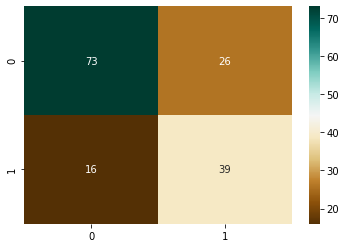

In [52]:
print(metrics.confusion_matrix(y_test,dt_pred))
cm_rf = metrics.confusion_matrix(y_test,dt_pred)
sns.heatmap(cm_rf,annot=True,cmap = 'BrBG')

# K_NN Classification 

* K-Nearest Neighbour is based on worked with the mathematical calculation of ecludian daistancce (x2-x1)^2 +(y2-y1)^2 this this the formula 
* we will predict the new data point after the claculation will be done  and  we will get the new data point  to taken point that the nearest values from old data or K points

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

### prediction 

In [76]:
knn_pred = knn.predict(X_test)

### Evaluation

<IPython.core.display.Javascript object>

rf_score is : 0.7597402597402597


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.51      0.60        55

    accuracy                           0.76       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.76      0.76      0.75       154



<IPython.core.display.Javascript object>

[[89 10]
 [27 28]]


<IPython.core.display.Javascript object>

<AxesSubplot:>

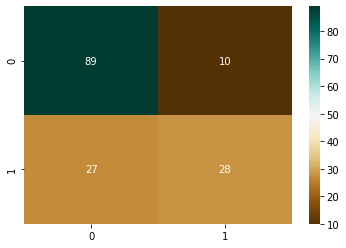

In [77]:
print('rf_score is :', metrics.accuracy_score(y_test,knn_pred))
print( metrics.classification_report(y_test,knn_pred))
print(metrics.confusion_matrix(y_test,knn_pred))
cm_knn = metrics.confusion_matrix(y_test,knn_pred)
sns.heatmap(cm_knn,annot=True,cmap = 'BrBG')

## SVM in SVC  Classification

* SVM is suport vector machine in this classification problem we will use the svc is supoort vector classification
- In this workflow process we have a dataset that classes will be have two classes after then will be separeted with the linear line and  we will merge the two parallel lines where the distance of  near data point to linear line
* that two points will be have d1 and d2 distances 

In [112]:
from sklearn.svm import SVC
svc = SVC(kernel= 'linear',degree=15,C=10)
svc.fit(X_train,y_train)

SVC(C=10, degree=15, kernel='linear')

## prediction 

In [113]:
pred_svc = svc.predict(X_test)

#### evaluation

<IPython.core.display.Javascript object>

rf_score is : 0.7597402597402597


<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



<IPython.core.display.Javascript object>

[[82 17]
 [20 35]]


<IPython.core.display.Javascript object>

<AxesSubplot:>

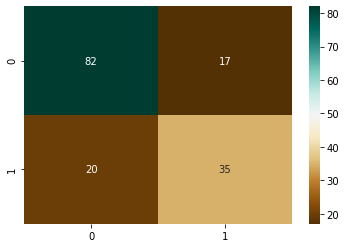

In [114]:
print('rf_score is :', metrics.accuracy_score(y_test,pred_svc))
print( metrics.classification_report(y_test,pred_svc))
print(metrics.confusion_matrix(y_test,pred_svc))
cm_svc = metrics.confusion_matrix(y_test,pred_svc)
sns.heatmap(cm_svc,annot=True,cmap = 'BrBG')

In [ ]:
pass 